# Ninja Warrior Dataset Exploration

### DESCRIPTION: Obstacle history of American Ninja Warrior seasons 1-10
#### Dataset: https://data.world/ninja/anw-obstacle-history

#### SUMMARY
This dataset includes every obstacle in the history of American Ninja Warrior from season 1 to 10. This includes the obstacles at Sasuke (also known as the original Ninja Warrior in Japan) during seasons 1-3 when American Ninja Warrior (ANW) was on G4, and the top 10 competitors from the semi-finals round of ANW were sent to Sasuke to compete. Starting in season 4 of ANW, which is known as the "NBC era" when the show took on the regional/city formats for both qualifying and semi-final rounds with the finalists from each region competing at the National Finals of ANW in Las Vegas.

Credit to Sasukepedia as the [original source](https://sasukepedia.fandom.com/wiki/List_of_American_Ninja_Warrior_obstacles)

In [1]:
# Pandas is a library for basic data analysis
import pandas as pd

# NumPy is a library for advanced mathematical computation
import numpy as np

# MatPlotLib is a library for basic data visualization
import matplotlib.pyplot as plt

# SeaBorn is a library for advanced data visualization
import seaborn as sns

from scipy import stats

# Dataset from above
df = pd.read_csv('American Ninja Warrior Obstacle History.csv')
# .set_index('Season')
df

,Season,Location,Round/Stage,Obstacle Name,Obstacle Order
0,1,Venice,Qualifying,Quintuple Steps,1
1,1,Venice,Qualifying,Rope Swing,2
2,1,Venice,Qualifying,Rolling Barrel,3
3,1,Venice,Qualifying,Jumping Spider,4
4,1,Venice,Qualifying,Pipe Slider,5
...,...,...,...,...,...
884,10,Las Vegas,National Finals - Stage 3,Curved Body Prop,5
885,10,Las Vegas,National Finals - Stage 3,Peg Cloud,6
886,10,Las Vegas,National Finals - Stage 3,Time Bomb,7
887,10,Las Vegas,National Finals - Stage 3,Cane Lane,8


### Questions to Consider Answering

- What sorts of information does this dataset contain?
    Season	Location	Round/Stage	Obstacle Name	Obstacle Order
---
- What kinds of questions might we be able to answer with this data?
    - What was the most occuring obstical              √
    ---
    - How Many Seasons are Recorded in This Dataset    √
    - Which Season had the most obsticals              √
    ---
    - What location had the most obsticals             √
    ---
    - Which obstacles presisted over seasons  
---
- What kinds of questions can’t we answer with this data?
    
- What sorts of information might be actionable?
    

In [2]:
df.nunique()

Season             10
Location           30
Round/Stage         8
Obstacle Name     225
Obstacle Order     10
dtype: int64

## What was the most occuring obstical

In [3]:
print(df["Obstacle Name"].describe())
print("---------------")
print(df["Obstacle Name"].value_counts(normalize=True, ascending=True))

count             889
unique            225
top       Warped Wall
freq               86
Name: Obstacle Name, dtype: object
---------------
Water Walls        0.001125
Heavenly Ladder    0.001125
Twelve Timbers     0.001125
Hang Slider        0.001125
Globe Grasper      0.001125
                     ...   
Log Grip           0.023622
Floating Steps     0.031496
Quintuple Steps    0.035996
Salmon Ladder      0.046119
Warped Wall        0.096738
Name: Obstacle Name, Length: 225, dtype: float64


### The Object That Appears The Most is The Warped Wall With a Frequency of 86 Occurances

## How Many Seasons are Recorded in This Dataset
## Which Season had the Most Obsticals

In [4]:
print(df['Season'].value_counts().sort_index())

1      40
2      38
3      38
4     118
5      88
6     104
7     120
8     103
9     120
10    120
Name: Season, dtype: int64


### 10 Seasons were recorded and Seasons 7, 9, & 10 had the most obsticals of 120

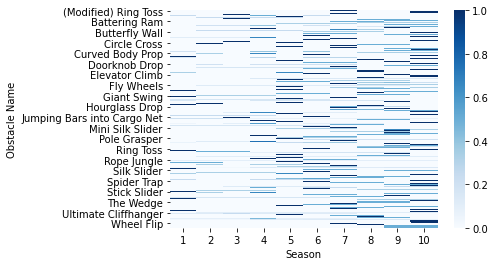

In [5]:
plt.show(sns.heatmap(pd.crosstab(df["Obstacle Name"], df["Season"], normalize='index'), cmap="Blues"))

## What Location had the Most Obsticals

In [6]:
print(df['Location'].value_counts())

Las Vegas               167
Venice                   93
Miami                    48
Denver                   48
Los Angeles              48
Kansas City              32
Philadelphia             32
Indianapolis             32
Dallas                   32
Sasuke 23 (Japan)        25
Sasuke 27 (Japan)        23
Sasuke 26 (Japan)        23
Southeast                17
Northeast                17
Pittsburgh               16
Atlanta                  16
San Pedro (Military)     16
Orlando                  16
Minneapolis              16
Oklahoma City            16
Daytona Beach            16
San Antonio              16
St. Louis                16
Baltimore                16
Houston                  16
Cleveland                16
Midwest                  15
Mid-South                15
Southwest                15
Northwest                15
Name: Location, dtype: int64


### Las Vegas Clearly has the most sitting at 167 

In [7]:
# f,(ax_count, ax_stack) = plt.subplots(2,
#             gridspec_kw={"height_ratios": (.5, .5)})

# df.groupby(['Track'])['NPS'].value_counts().unstack().plot(
#             kind='bar', stacked=True, ax=ax_stack)
# sns.countplot(x='Track', hue="NPS",
#             data=df.sort_values('Track'), ax=ax_count)
# plt.show()


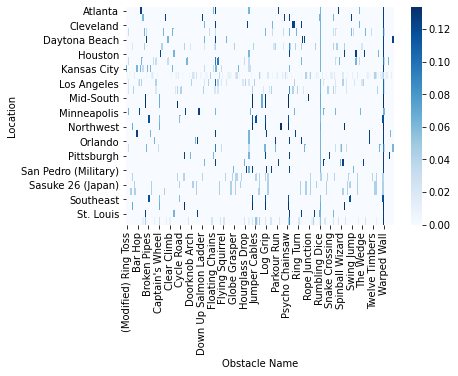

In [8]:
plt.show(sns.heatmap(pd.crosstab(df["Location"], df["Obstacle Name"], normalize='index'), cmap="Blues"))

![rubric](rubric.png)

In [26]:
stats.describe(df.describe())

DescribeResult(nobs=8, minmax=(array([1., 1.]), array([889., 889.])), mean=array([116.12460606, 114.89507021]), variance=array([97533.78373562, 97842.65809398]), skewness=array([2.26734599, 2.26742547]), kurtosis=array([3.14174684, 3.14194388]))

In [24]:
[print(i) for i in stats.describe(df.describe())]

8
(array([1., 1.]), array([889., 889.]))
[116.12460606 114.89507021]
[97533.78373562 97842.65809398]
[2.26734599 2.26742547]
[3.14174684 3.14194388]


[None, None, None, None, None, None]

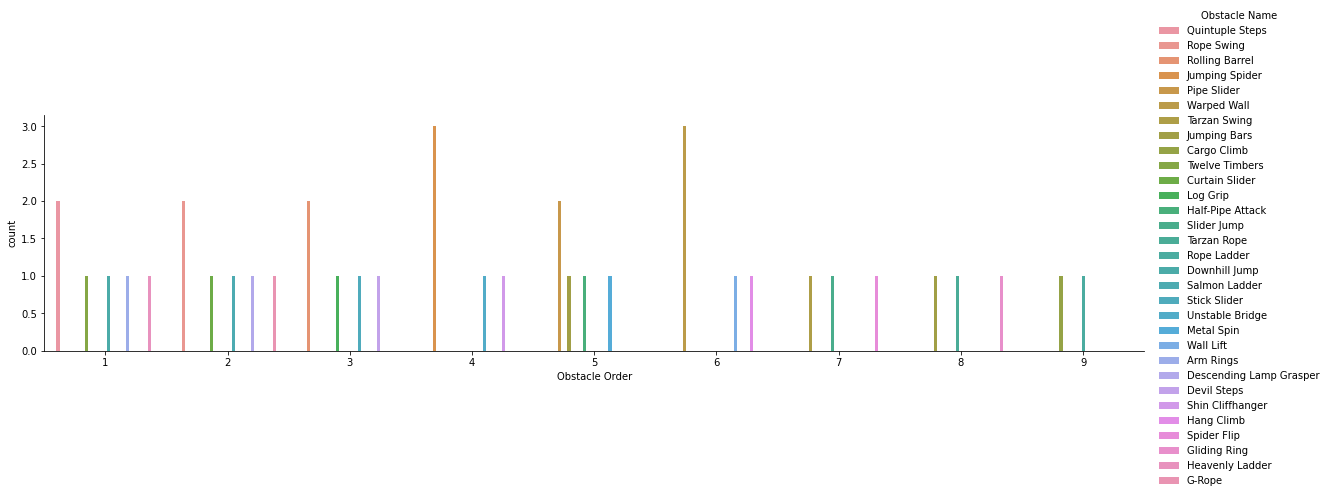

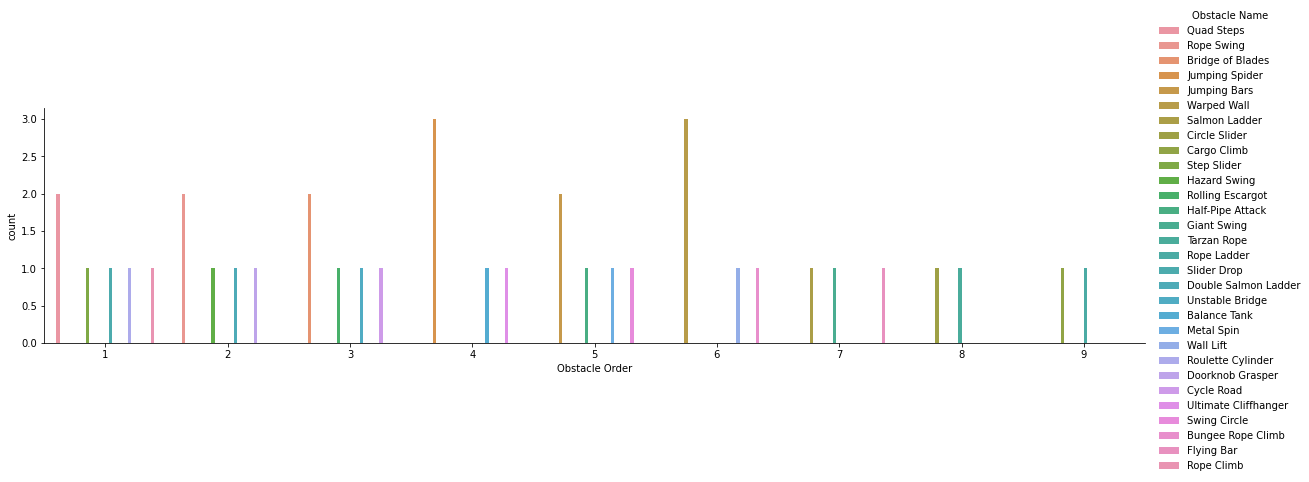

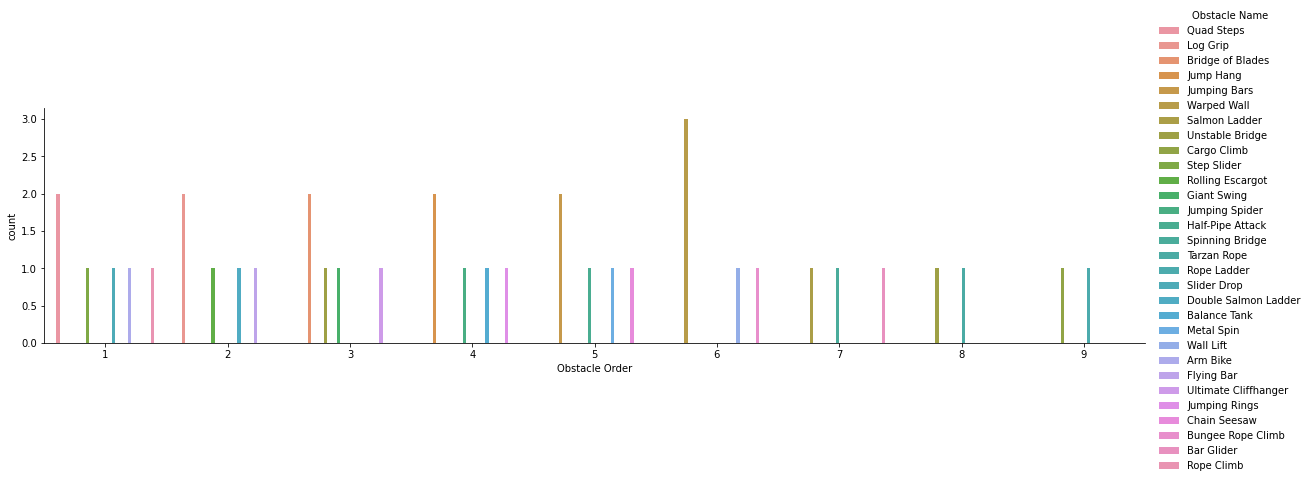

In [30]:
for i in range(3):
    s = df[df['Season'] == i+1]

    sns.catplot(x="Obstacle Order", hue="Obstacle Name",
                data=s, kind="count",
                height=4, aspect=4);

In [ ]:
# f,(ax_count, ax_stack) = plt.subplots(2,
#             gridspec_kw={"height_ratios": (.5, .5)})

# df.groupby(["Obstacle Name"])["Season"].value_counts().unstack().plot(
#             kind='bar', stacked=True, ax=ax_stack)
# sns.countplot(x="Obstacle Name", hue="Season",
#             data=df.sort_values("Obstacle Name"), ax=ax_count)
# plt.show()

# sns.catplot(x="Season", hue="Obstacle Name",
#             data=df, kind="count",
#             height=4, aspect=4);